<a href="https://colab.research.google.com/github/Stevox2014/pythoncode/blob/main/Logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis and Pre-Processing
#### Practical 4


---



In this practical you are tasked with exploring and processing a [hotel bookings dataset. ](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) Please use the csv file from the Moodle page as I have intentionally made some changes, but you may refer to the dataset's page for feature information.

I have created sections for you to complete. These suggestions are mere suggestions. If you would like to try any additional methods that is encouraged.


In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

Import the data.

In [ ]:
hotel = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.max_columns',None)
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Understand the data.

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81537 entries, 0 to 81536
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81537 non-null  object 
 1   is_canceled                     81537 non-null  int64  
 2   lead_time                       81537 non-null  int64  
 3   arrival_date_year               81537 non-null  int64  
 4   arrival_date_month              81537 non-null  object 
 5   arrival_date_week_number        81537 non-null  int64  
 6   arrival_date_day_of_month       81537 non-null  int64  
 7   stays_in_weekend_nights         81537 non-null  int64  
 8   stays_in_week_nights            81537 non-null  int64  
 9   adults                          81537 non-null  int64  
 10  children                        81533 non-null  float64
 11  babies                          81537 non-null  int64  
 12  meal                            

Can you identify a target feature from the dataset? Write the feature name in the cell below:

**lead_time**

Get a statistical summary.

In [ ]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81533.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,69480.000000,4609.000000,81537.000000,81537.000000,81537.000000,81537.000000
mean,0.530520,112.695206,2016.041122,28.165471,15.699327,0.983210,2.669708,1.857034,0.101799,0.008548,0.034083,0.113004,0.153562,0.203956,113.561888,196.211543,2.875713,98.060807,0.071820,0.469860
std,0.499071,112.343339,0.754119,13.652905,8.785585,1.051007,2.073458,0.597639,0.398340,0.103358,0.181443,1.010728,1.680099,0.634970,119.083391,135.180733,20.257558,54.185302,0.262151,0.747791
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,21.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,62.000000,0.000000,0.000000
50%,1.000000,77.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,202.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,174.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,281.000000,0.000000,121.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Look at the distribution of a feature of your choice.

<Axes: >

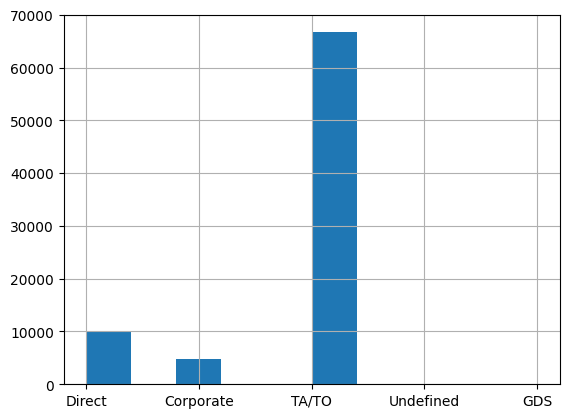

In [ ]:
hotel['distribution_channel'].hist()

<Axes: >

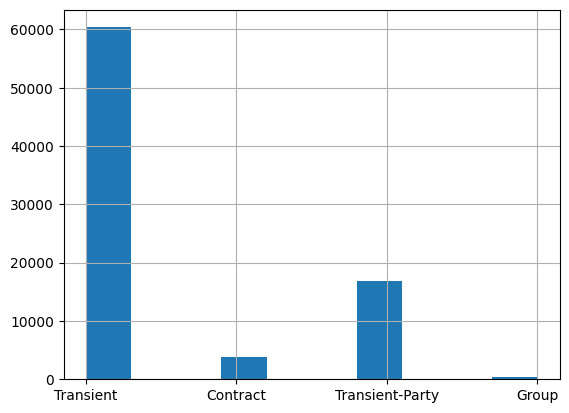

In [ ]:
hotel['customer_type'].hist()

Check for missing values (I've gotten you started with my code to help you check) & handle all missing values using **at least two imputation methods**.

In [ ]:
null_counts = hotel.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Filter to only columns with missing values
print(null_counts)

children        4
country       487
agent       12057
company     76928
dtype: int64


In [ ]:
hotel['children'].fillna(st.mode(hotel['children']), inplace =True)

In [ ]:
from os import stat
hotel.drop( columns = ['agent','company'], inplace = True)
hotel['country'].fillna(st.mode(hotel['country']),inplace = True)

Check for, and remove, duplicates.

In [ ]:
hotel.duplicated().sum()
hotel.drop_duplicates(inplace = True)


Check for outliers (try out both of my methods from the "[EDA and Pre-processing Walkthrough Notebook](https://colab.research.google.com/drive/1GQY0Kq_I0RIm8TmVxTn8j-thtR-KgLsk?usp=sharing)").

<Axes: >

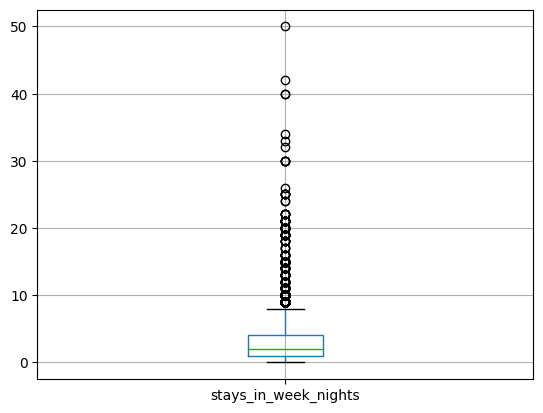

In [ ]:
hotel.boxplot(column = 'stays_in_week_nights')

<Axes: >

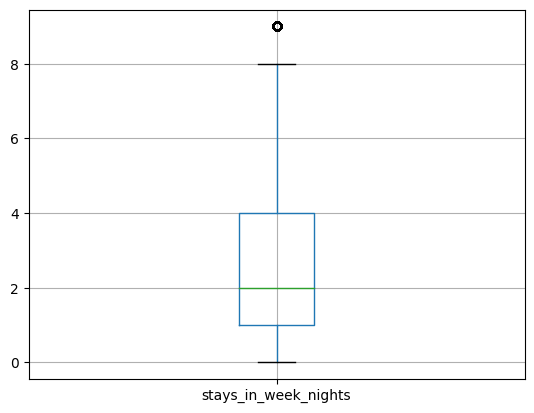

In [ ]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(hotel['stays_in_week_nights']))
hotel_z = hotel[(z_scores < 3)]  # DataFrame after removing outliers

hotel_z.boxplot(column='stays_in_week_nights')

1.0
4.0
3.0


<Axes: >

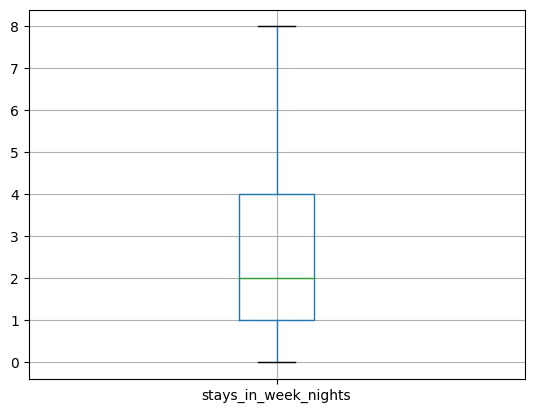

In [ ]:
#IQR
Q1 = hotel['stays_in_week_nights'].quantile(0.25)
Q3 = hotel['stays_in_week_nights'].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print(IQR)

filter = (hotel['stays_in_week_nights'] >= Q1 - 1.5 * IQR) & (hotel['stays_in_week_nights'] <= Q3 + 1.5 *IQR)
hotels = hotel.loc[filter]  # Original DataFrame is updated

hotels.boxplot(column='stays_in_week_nights')

Try out one-hot encoding or label encoding for the categorical variables.

In [ ]:
hotel2 = pd.get_dummies(hotel, columns=['distribution_channel','reserved_room_type',	'assigned_room_type'	,'booking_changes',	'deposit_type','arrival_date_month','customer_type'])
pd.set_option('display.max_columns',None)
hotel2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,booking_changes_0,booking_changes_1,booking_changes_2,booking_changes_3,booking_changes_4,booking_changes_5,booking_changes_6,booking_changes_7,booking_changes_8,booking_changes_9,booking_changes_10,booking_changes_11,booking_changes_12,booking_changes_13,booking_changes_14,booking_changes_15,booking_changes_16,booking_changes_17,booking_changes_20,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,0,0.0,0,0,Check-Out,2015-07-01,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,0,0.0,0,0,Check-Out,2015-07-01,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,0,75.0,0,0,Check-Out,2015-07-02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,0,75.0,0,0,Check-Out,2015-07-02,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,0,BB,GBR,Online TA,0,0,0,0,98.0,0,1,Check-Out,2015-07-03,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


Can you use binning anywhere?

In [ ]:
hotel['is_canceled'].value_counts()

0    32445
1    23850
Name: is_canceled, dtype: int64

In [ ]:
hotel['is_canceled']= hotel['is_canceled'].map({0:1,1:2})
hotel['is_canceled'].value_counts()

1    32445
2    23850
Name: is_canceled, dtype: int64

Drop a column you think is irrelevant for predicting whether or not a customer will cancel.

In [ ]:
hotel.drop(columns= 'country', inplace = True)

Check the null values again. If there are any remaining, please handle the rest of the features.

In [ ]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56295 entries, 0 to 81536
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           56295 non-null  object 
 1   is_canceled                     56295 non-null  int64  
 2   lead_time                       56295 non-null  int64  
 3   arrival_date_year               56295 non-null  int64  
 4   arrival_date_month              56295 non-null  object 
 5   arrival_date_week_number        56295 non-null  int64  
 6   arrival_date_day_of_month       56295 non-null  int64  
 7   stays_in_weekend_nights         56295 non-null  int64  
 8   stays_in_week_nights            56295 non-null  int64  
 9   adults                          56295 non-null  int64  
 10  children                        56295 non-null  float64
 11  babies                          56295 non-null  int64  
 12  meal                            

Perform some visualisations of your data. You must show me:

1. An example of a univariate analysis (one feature)
2. A bivariate analysis (compare two features)
3. A multivariate analysis (compare 3+ features)

<Axes: ylabel='customer_type'>

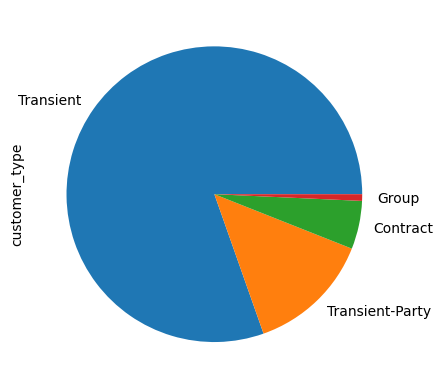

In [ ]:
hotel['customer_type'].value_counts().plot(kind ='pie')


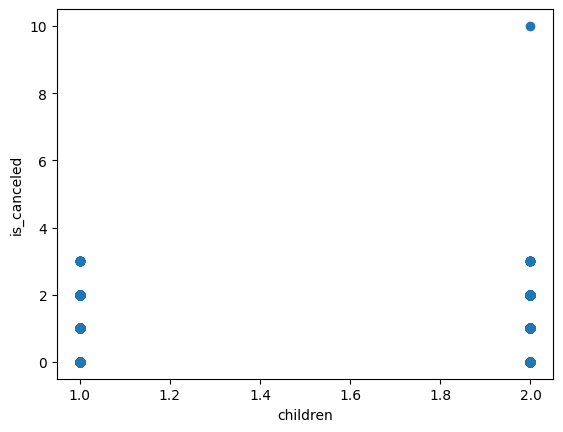

In [ ]:
plt.scatter(hotel['is_canceled'], hotel['children'])
plt.xlabel('children')
plt.ylabel('is_canceled')
plt.show()

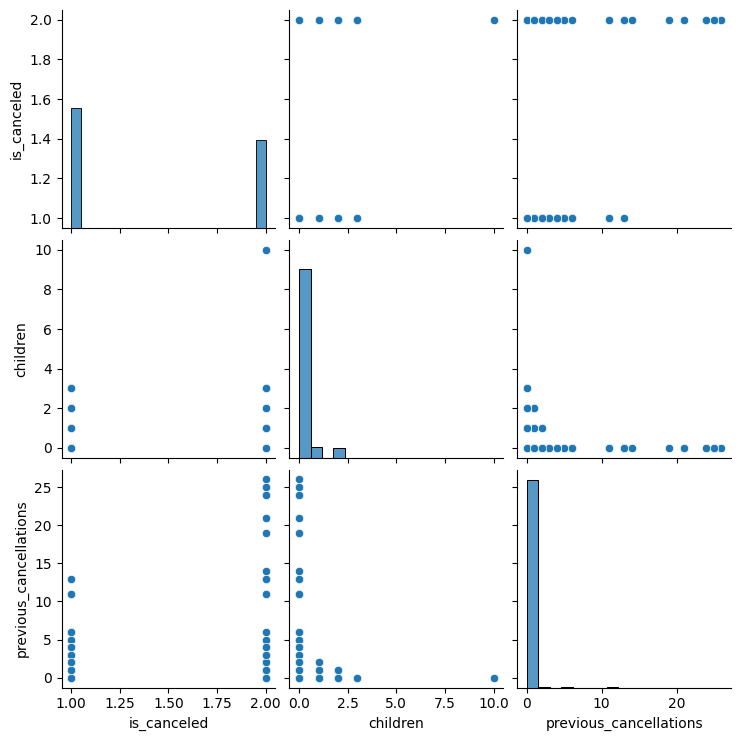

In [ ]:
sns.pairplot(hotel[['is_canceled', 'children', 'previous_cancellations']])
plt.show()

Create a correlation heatmap.

<ipython-input-24-20266a96f694>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hotel.corr()


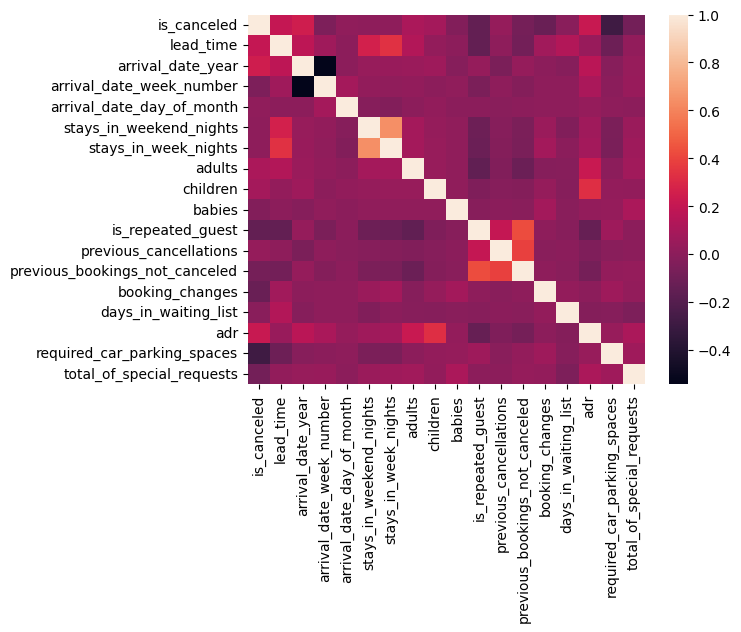

In [ ]:
correlation_matrix = hotel.corr()
sns.heatmap(correlation_matrix)
plt.show()

What features are highly correlated with your target feature? You can write them here, or show me using code:

**stays_in_week_nights**
**stays_in_weekend_nights**[link text](https://)

In [ ]:
hotel2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,booking_changes_0,booking_changes_1,booking_changes_2,booking_changes_3,booking_changes_4,booking_changes_5,booking_changes_6,booking_changes_7,booking_changes_8,booking_changes_9,booking_changes_10,booking_changes_11,booking_changes_12,booking_changes_13,booking_changes_14,booking_changes_15,booking_changes_16,booking_changes_17,booking_changes_20,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,0,0.0,0,0,Check-Out,2015-07-01,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,0,0.0,0,0,Check-Out,2015-07-01,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,0,75.0,0,0,Check-Out,2015-07-02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,0,75.0,0,0,Check-Out,2015-07-02,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,0,BB,GBR,Online TA,0,0,0,0,98.0,0,1,Check-Out,2015-07-03,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


What features would you drop?  Do so here:

In [ ]:
hotel2 =hotel2.drop(columns =['hotel','meal','market_segment','reservation_status','reservation_status_date', 'country'], axis=1)
hotel2.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,booking_changes_0,booking_changes_1,booking_changes_2,booking_changes_3,booking_changes_4,booking_changes_5,booking_changes_6,booking_changes_7,booking_changes_8,booking_changes_9,booking_changes_10,booking_changes_11,booking_changes_12,booking_changes_13,booking_changes_14,booking_changes_15,booking_changes_16,booking_changes_17,booking_changes_20,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,75.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,75.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,98.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


Standardise your features using the [MinMax Stanardiser](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html):



In [ ]:
# You may need to modify the below based on the MinMax documentation to work for you.

from sklearn.preprocessing import StandardScaler, MinMaxScaler
#this one is the min max standardisation between 0 and 1
scaler = MinMaxScaler()
hotel2[hotel2.columns] = scaler.fit_transform(hotel2[hotel2.columns])

### Great job! We will build on this practical for Practical 5 but you will submit this first notebook on 28/5 before midnight.

### However, to get full credit for Practical 5, you must include the work you performed here. So, though it is a lot of work, it will serve you well to comeplete it :)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Test Train Spilt
x = hotel2.drop('is_canceled', axis =1)
y= hotel2['is_canceled']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=66)



**Logistics Regression**

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
predictions = logmodel.predict(x_test)
L= (accuracy_score(y_test, predictions)*100)
z = (classification_report(y_test, predictions))
v = (confusion_matrix(y_test, predictions))
print(L)

77.96429523048228


<Axes: >

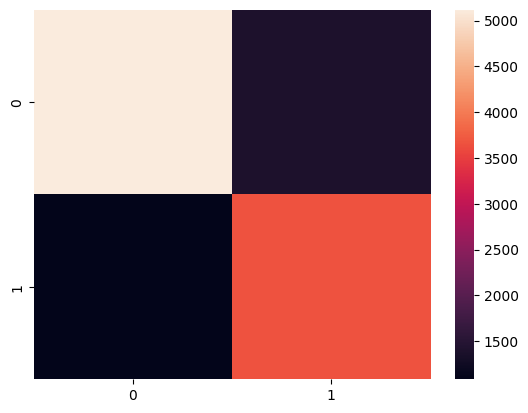

In [ ]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, predictions))

In [ ]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.80      6517
         1.0       0.72      0.77      0.75      4742

    accuracy                           0.78     11259
   macro avg       0.77      0.78      0.78     11259
weighted avg       0.78      0.78      0.78     11259



In [ ]:
# print coefficients of model with feature names
coeff_df = pd.DataFrame(hotel2.columns.delete(0))

coeff_df.columns = ['Features']

coeff_df["Coefficient Estimate"] = pd.Series(logmodel.coef_[0])

coeff_df

**Using optimisation techniques - stochastic GD**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log", penalty="l2")
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
sgd.score(x_train, y_train)
S = round(sgd.score(x_train, y_train) * 100, 2)
print(S)

**Batch gradient descent**


In [ ]:

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(loss="squared_error", penalty="l2", max_iter=1000)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
sgd.score(x_train, y_train)
B= round(sgd.score(x_train, y_train) * 100, 2)
print(B)


In [ ]:
models= pd.DataFrame({
    'Model': ['Logistics Regression', 'Stochastic gradient', 'Batch gradient descent'],
    'score':[L,S,B]
    })
models.sort_values(by='score', ascending=False)


The model that performed best was the logistics Regression because it has the highest score. But it was also closely followed by the stochastic gradient. but the batch gradient decent canbe use at all. because its score was ridiculosly low.